In [1]:
import pandas as pd
import numpy as np
import random as rd
import datetime as dt
import matplotlib.pyplot as plt
import sys
%pylab inline

sys.path.append('D:/Python/AntoTradingSystem/gdax')

import gdax
import json

import myfunctions as myf

loc ='D:/Python/AntoTradingSystem/gdax/'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Anto\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
import mygdax
newpk = mygdax.pk()
auth_client = gdax.AuthenticatedClient(newpk.key, newpk.b64secret, newpk.passphrase)

In [4]:
#auth_client.get_accounts()

In [5]:
public_client = gdax.PublicClient()
public_client.get_product_order_book('BTC-USD', level=1)

x = public_client.get_product_ticker(product_id='BTC-EUR')
public_client.get_products()

pd.DataFrame(list(x.items()))

,0,1
0,bid,5405
1,volume,6376.20982943
2,trade_id,5265279
3,time,2017-11-12T08:45:31.909000Z
4,ask,5405.01
5,price,5405.77000000
6,size,0.02000000


In [6]:
public_client = gdax.PublicClient()
public_client.get_product_order_book('BTC-USD', level=2)
x = public_client.get_product_ticker(product_id='ETH-USD')
public_client.get_products()

pd.DataFrame(list(x.items()))

,0,1
0,bid,306.33
1,volume,182889.49444205
2,trade_id,14953182
3,time,2017-11-12T08:45:36.129000Z
4,ask,306.49
5,price,306.53000000
6,size,0.00006505


In [7]:
x = public_client.get_product_order_book('BTC-EUR', level=3)
#pd.DataFrame(list(x.items()))
print(public_client.get_time())
#pd.DataFrame.from_dict(x).head(20)

def aggr_order_book3(x):
    typs = (('asks',True),('bids',False))
    df = pd.DataFrame()
    for typ in typs:
        pd.DataFrame(x[typ[0]])
        df_ = pd.DataFrame(x[typ[0]])[[0,1]]
        df_[0] = df_[0].map(lambda x: float(x))
        df_[1] = df_[1].map(lambda x: float(x))
        df_ = df_.groupby(0).sum()
        df_.columns = [typ[0]+'_size']
        df_[typ[0]+'_price'] = df_.index
        df_ = df_.sort_values(typ[0]+'_price', ascending=typ[1])
        df_ = df_.reset_index(drop=True)
        df_=df_[[typ[0]+'_price', typ[0]+'_size']]
        df = pd.concat([df,df_], axis=1)
    return df


{u'epoch': 1510476344.952, u'iso': u'2017-11-12T08:45:44.952Z'}


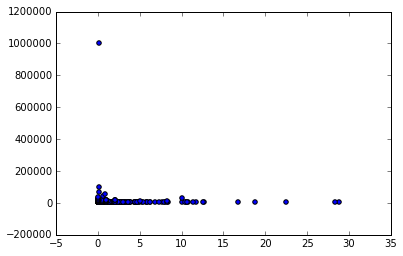

In [12]:
dfag = aggr_order_book3(x)
x_ = dfag['asks_size']
y_ = dfag['asks_price']
plt.scatter(x_, y_)

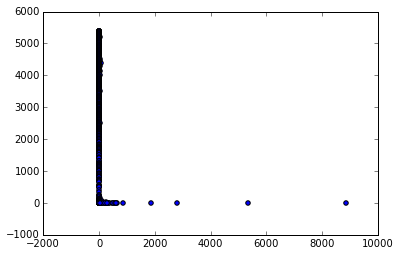

In [13]:
x_ = dfag['bids_size']
y_ = dfag['bids_price']
plt.scatter(x_, y_)

In [11]:
dfag

,asks_price,asks_size,bids_price,bids_size
0,5405.01,7.709800,5405.00,1.727876
1,5405.87,0.202842,5400.00,6.245017
2,5406.01,0.267781,5395.00,0.056200
3,5408.60,0.650000,5394.51,0.037075
4,5408.61,0.190112,5390.01,0.010258
5,5412.43,0.650000,5390.00,2.580000
6,5412.44,0.017714,5385.00,0.050000
7,5412.45,0.267781,5381.00,0.010000
8,5412.79,0.267781,5374.51,0.037213
9,5412.80,4.669302,5370.00,0.010000


In [14]:
x = public_client.get_product_order_book('BTC-EUR', level=2)
#pd.DataFrame(list(x.items()))
print(public_client.get_time())
#pd.DataFrame.from_dict(x)

ask=pd.DataFrame(x['asks'], columns=['ask_price','ask_size','ask_num'])
bid=pd.DataFrame(x['bids'], columns=['bid_price','bid_size','bid_num'])

pd.concat([ask, bid], axis=1)

{u'epoch': 1510476465.64, u'iso': u'2017-11-12T08:47:45.640Z'}


,ask_price,ask_size,ask_num,bid_price,bid_size,bid_num
0,5339.17,0.19,1,5334.53,0.03037584,2
1,5339.18,0.03388523,1,5334.52,1.09,2
2,5339.2,0.23,1,5334.51,0.08,1
3,5339.23,0.15,1,5334.49,0.20756844,2
4,5339.25,0.2,1,5330.44,0.66,1
5,5339.28,0.2,1,5330.43,0.03,1
6,5339.3,0.18,1,5330.41,0.04,1
7,5339.33,0.18,1,5330.38,0.03,1
8,5339.41,0.07654776,1,5330.36,0.06,1
9,5341.51,0.18501441,1,5330.35,0.05,1


In [15]:
y = public_client.get_product_trades(product_id='BTC-EUR')

pd.DataFrame.from_dict(y).head()


,price,side,size,time,trade_id
0,5339.17000000,sell,0.13300609,2017-11-12T08:47:45.332Z,5265435
1,5339.16000000,sell,0.07654776,2017-11-12T08:47:45.332Z,5265434
2,5334.52000000,buy,0.42834001,2017-11-12T08:47:45.116Z,5265433
3,5334.53000000,buy,0.02000000,2017-11-12T08:47:45.116Z,5265432
4,5334.55000000,buy,0.05000000,2017-11-12T08:47:45.116Z,5265431


(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text xticklabel objects>)

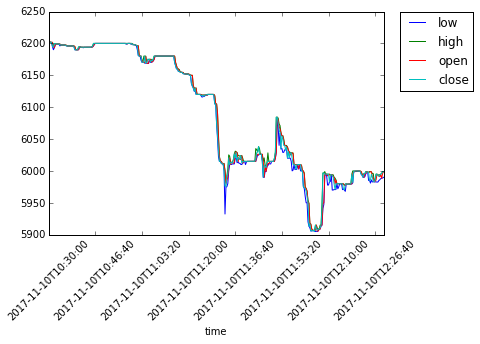

In [16]:
z = public_client.get_product_historic_rates('BTC-EUR', 
                                             start='2017-11-10T10:30:00Z', 
                                             end='2017-11-10T12:30:00Z',
                                             granularity=20)

#z = public_client.get_product_historic_rates('BTC-EUR')
dfh = pd.DataFrame(z, columns=['time','low','high','open','close','volume'])
dfh['time'] = dfh['time'].map(lambda x: dt.datetime.utcfromtimestamp(x).isoformat())
dfh.index = dfh['time']
dfh = dfh.sort_values('time')
dfh[[1,2,3,4]].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [17]:
t = public_client.get_time()
dft = pd.DataFrame(list(t.items()))
dft

,0,1
0,epoch,1.51048e+09
1,iso,2017-11-12T08:48:08.768Z
